# Data Collection and Pre-Processing
*Here I use the data from https://www.cryptodatadownload.com/ to create a train and test set for my models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ethData = pd.read_csv('Coinbase_ETHUSD_1h.csv', header = 1)

In [3]:
ethData.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-08-05 03-PM,ETHUSD,394.97,396.41,393.27,396.12,2821.61,1115468.85
1,2020-08-05 02-PM,ETHUSD,399.52,400.00,390.56,394.97,13497.02,5335869.99
2,2020-08-05 01-PM,ETHUSD,399.68,402.47,397.75,399.52,12616.77,5042197.51
3,2020-08-05 12-PM,ETHUSD,397.69,400.89,395.39,399.68,15939.92,6350713.81
4,2020-08-05 11-AM,ETHUSD,392.80,397.80,392.80,397.69,11127.11,4407241.22


In [4]:
ethData.shape[0]

27149

In [5]:
ethData.corr()

,Open,High,Low,Close,Volume ETH,Volume USD
Open,1.000000,0.999818,0.999747,0.999686,0.033940,0.480830
High,0.999818,1.000000,0.999602,0.999829,0.041234,0.489963
Low,0.999747,0.999602,1.000000,0.999796,0.025120,0.469757
Close,0.999686,0.999829,0.999796,1.000000,0.034066,0.481365
Volume ETH,0.033940,0.041234,0.025120,0.034066,1.000000,0.706661
Volume USD,0.480830,0.489963,0.469757,0.481365,0.706661,1.000000


In [6]:
ethData['Close'] = ethData['Close'].replace(0, method='ffill')
ethPrices = ethData['Close'].to_numpy()

In [7]:
ethPrices[:10]

array([396.12, 394.97, 399.52, 399.68, 397.69, 392.8 , 393.27, 390.48,
       390.05, 390.5 ])

(array([], dtype=int64),)


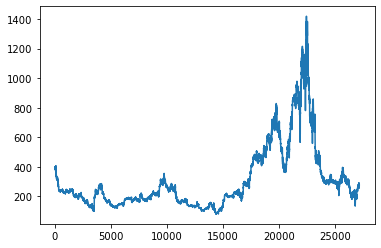

In [8]:
print(np.where(ethPrices == 0))
plt.plot(ethPrices)

In [9]:
def percent_change(arr):
    array = np.copy(arr)
    p0 = array[0]
    for i in range(len(array)):
        p = array[i]
        if p0==p:
            array[i]=0
            continue
        elif p0==0:
            array[i]=1
            p0=p
            continue
        array[i] = 100 * (p - p0)/p0
        p0 = p
    return array

In [10]:
def price_fluc(df):
    fluc = []
    for index, row in df.iterrows():
        fluc.append(100*(row['High'] - row['Low']) / row['High'])
    return fluc
price_fluctuations = price_fluc(ethData)

price_fluctuations[:10]

[0.7921091798895192,
 2.3599999999999994,
 1.1727582180038332,
 1.3719474169971813,
 1.256913021618904,
 0.5792094299359752,
 0.830518375536545,
 0.7220492932591682,
 0.7469345093940416,
 0.8959618264423029]

In [11]:
eth_pct = percent_change(ethPrices)

Text(0.5, 1.0, 'Price fluctuation for Ethereum')

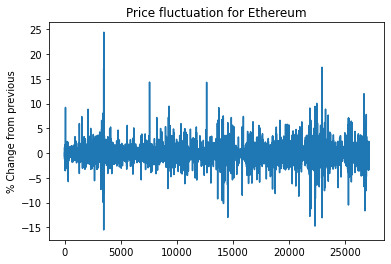

In [12]:
plt.plot(eth_pct)
plt.ylabel('% Change from previous')
plt.title('Price fluctuation for Ethereum')

In [13]:
print(eth_pct[1003])

0.06822445846835945


In [14]:
print(np.max(eth_pct))

24.378109452736332


In [15]:
print(np.where(eth_pct > 50))#as expected we have no massive fluctuations above 25% 

(array([], dtype=int64),)


In [16]:
print(np.where(ethPrices == 0)) 

(array([], dtype=int64),)


Text(0.5, 1.0, 'Price fluctuation for Ethereum')

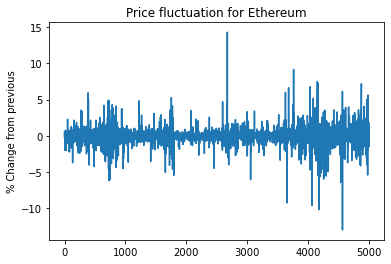

In [17]:
plt.plot(eth_pct[10000:15000])
plt.ylabel('% Change from previous')
plt.title('Price fluctuation for Ethereum')

In [18]:
large_fs = np.where(np.abs(eth_pct)>15)
large_fs

(array([ 3492,  3494,  3510, 22971], dtype=int64),)

In [19]:
#ethData.iloc[3492-1:3510+1][['Close', '%Change']]

In [20]:
s = pd.Series(eth_pct, name = '%Change')
s

0        0.000000
1       -0.290316
2        1.151986
3        0.040048
4       -0.497898
           ...   
27144    1.705224
27145   -2.505778
27146    1.147738
27147    2.247107
27148    0.065495
Name: %Change, Length: 27149, dtype: float64

In [21]:
ethData['%Change'] = s
ethData['%Fluc'] = pd.Series(price_fluctuations, name='%Fluc')
ethData.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,%Change,%Fluc
0,2020-08-05 03-PM,ETHUSD,394.97,396.41,393.27,396.12,2821.61,1115468.85,0.000000,0.792109
1,2020-08-05 02-PM,ETHUSD,399.52,400.00,390.56,394.97,13497.02,5335869.99,-0.290316,2.360000
2,2020-08-05 01-PM,ETHUSD,399.68,402.47,397.75,399.52,12616.77,5042197.51,1.151986,1.172758
3,2020-08-05 12-PM,ETHUSD,397.69,400.89,395.39,399.68,15939.92,6350713.81,0.040048,1.371947
4,2020-08-05 11-AM,ETHUSD,392.80,397.80,392.80,397.69,11127.11,4407241.22,-0.497898,1.256913


In [22]:
grad = []
for change in ethData['%Change']:
    if change < 0:
        grad.append(0)
    else:
        grad.append(1)
print(grad[:10])
ethData['Gradient'] = pd.Series(grad, name = 'Gradient')
ethData.head()

[1, 0, 1, 1, 0, 0, 1, 0, 0, 1]


,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,%Change,%Fluc,Gradient
0,2020-08-05 03-PM,ETHUSD,394.97,396.41,393.27,396.12,2821.61,1115468.85,0.000000,0.792109,1
1,2020-08-05 02-PM,ETHUSD,399.52,400.00,390.56,394.97,13497.02,5335869.99,-0.290316,2.360000,0
2,2020-08-05 01-PM,ETHUSD,399.68,402.47,397.75,399.52,12616.77,5042197.51,1.151986,1.172758,1
3,2020-08-05 12-PM,ETHUSD,397.69,400.89,395.39,399.68,15939.92,6350713.81,0.040048,1.371947,1
4,2020-08-05 11-AM,ETHUSD,392.80,397.80,392.80,397.69,11127.11,4407241.22,-0.497898,1.256913,0


In [23]:
ethData.corr()

,Open,High,Low,Close,Volume ETH,Volume USD,%Change,%Fluc,Gradient
Open,1.000000,0.999818,0.999747,0.999686,0.033940,0.480830,0.011134,0.162989,-0.009225
High,0.999818,1.000000,0.999602,0.999829,0.041234,0.489963,0.011320,0.172234,-0.008712
Low,0.999747,0.999602,1.000000,0.999796,0.025120,0.469757,0.011980,0.150516,-0.008433
Close,0.999686,0.999829,0.999796,1.000000,0.034066,0.481365,0.011776,0.162144,-0.008003
Volume ETH,0.033940,0.041234,0.025120,0.034066,1.000000,0.706661,-0.018850,0.827085,-0.010901
Volume USD,0.480830,0.489963,0.469757,0.481365,0.706661,1.000000,-0.021929,0.700356,-0.012133
%Change,0.011134,0.011320,0.011980,0.011776,-0.018850,-0.021929,1.000000,-0.017893,0.593376
%Fluc,0.162989,0.172234,0.150516,0.162144,0.827085,0.700356,-0.017893,1.000000,-0.013479
Gradient,-0.009225,-0.008712,-0.008433,-0.008003,-0.010901,-0.012133,0.593376,-0.013479,1.000000


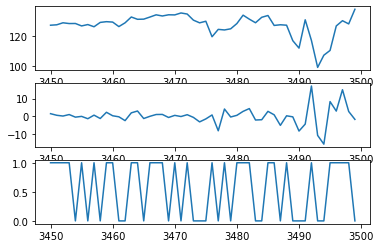

In [24]:
plt.subplot(311)
plt.plot(ethData['Open'][3450:3500])
plt.subplot(312)
plt.plot(ethData['%Change'][3450:3500])
plt.subplot(313)
plt.plot(ethData['Gradient'][3450:3500])
plt.show()

## Batch and Split the data into sets

We'll want to create a sequence of % changes with a given sequence_length variable and a gradient target classifier.

In [25]:
#DEFINE SEQUENCE LENGTH
seq_len=7

In [26]:
def create_targets(dataset, sequence_length):
    mLData = []
    for i in range(sequence_length, dataset.shape[0]):
        mLData.append([dataset['%Change'][i-sequence_length:i].to_numpy(),dataset['Gradient'][i]])
    return mLData

#create the data into sequences with the correct targets

input_data = create_targets(ethData,seq_len)

input_data[0]

[array([ 0.        , -0.29031607,  1.15198623,  0.04004806, -0.49789832,
        -1.22960095,  0.11965377]),
 0]

In [27]:
#Randomize the list
import random
random.shuffle(input_data)

In [28]:
n=len(input_data)
train=int(0.7*n)
valid=int(0.2*n)
test=int(0.1*n)
train_data=input_data[:train]
valid_data=input_data[train:train+valid]
test_data=input_data[-test:]


In [29]:
print(len(input_data))
for i in range(3):
    print(input_data[i])

27142
[array([ 0.92354215,  0.57901769, -0.29388084, -0.78330036, -0.93191714,
        1.92244496,  0.90278897]), 1]
[array([ 0.35592617,  0.06079951,  0.41014735,  0.38830055, -0.41191541,
        0.56998739,  0.62192798]), 1]
[array([-1.71486015,  0.1835028 , -1.06597003,  0.46133301,  0.60422961,
        0.69069069,  0.0029824 ]), 0]


In [30]:
ethData.head(7)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,%Change,%Fluc,Gradient
0,2020-08-05 03-PM,ETHUSD,394.97,396.41,393.27,396.12,2821.61,1115468.85,0.000000,0.792109,1
1,2020-08-05 02-PM,ETHUSD,399.52,400.00,390.56,394.97,13497.02,5335869.99,-0.290316,2.360000,0
2,2020-08-05 01-PM,ETHUSD,399.68,402.47,397.75,399.52,12616.77,5042197.51,1.151986,1.172758,1
3,2020-08-05 12-PM,ETHUSD,397.69,400.89,395.39,399.68,15939.92,6350713.81,0.040048,1.371947,1
4,2020-08-05 11-AM,ETHUSD,392.80,397.80,392.80,397.69,11127.11,4407241.22,-0.497898,1.256913,0
5,2020-08-05 10-AM,ETHUSD,393.27,393.64,391.36,392.80,2310.82,906502.29,-1.229601,0.579209,0
6,2020-08-05 09-AM,ETHUSD,390.48,393.73,390.46,393.27,3268.82,1282693.38,0.119654,0.830518,1


In [31]:
ethData.corr()

,Open,High,Low,Close,Volume ETH,Volume USD,%Change,%Fluc,Gradient
Open,1.000000,0.999818,0.999747,0.999686,0.033940,0.480830,0.011134,0.162989,-0.009225
High,0.999818,1.000000,0.999602,0.999829,0.041234,0.489963,0.011320,0.172234,-0.008712
Low,0.999747,0.999602,1.000000,0.999796,0.025120,0.469757,0.011980,0.150516,-0.008433
Close,0.999686,0.999829,0.999796,1.000000,0.034066,0.481365,0.011776,0.162144,-0.008003
Volume ETH,0.033940,0.041234,0.025120,0.034066,1.000000,0.706661,-0.018850,0.827085,-0.010901
Volume USD,0.480830,0.489963,0.469757,0.481365,0.706661,1.000000,-0.021929,0.700356,-0.012133
%Change,0.011134,0.011320,0.011980,0.011776,-0.018850,-0.021929,1.000000,-0.017893,0.593376
%Fluc,0.162989,0.172234,0.150516,0.162144,0.827085,0.700356,-0.017893,1.000000,-0.013479
Gradient,-0.009225,-0.008712,-0.008433,-0.008003,-0.010901,-0.012133,0.593376,-0.013479,1.000000


The data looks like it checks out, and correct next gradient given a previous sequence of 5

## Attempting pattern recognition with a very simple model

Next we can try to predict the gradient with a fully connected neural network. This will likely be innacurate but is a good litmus test for how our data behaves 

In [32]:
from torch import nn
import torch

In [33]:
#TODO: fix error when specifying larger batch size than 1 --- FIXED
batch_size=32

trainLoader = torch.utils.data.DataLoader(train_data,batch_size = batch_size, shuffle=True)
validLoader = torch.utils.data.DataLoader(valid_data,batch_size = batch_size, shuffle=True)
testLoader = torch.utils.data.DataLoader(test_data,batch_size = batch_size, shuffle=True)

In [34]:

net = nn.Sequential(nn.Linear(seq_len,16),
                 nn.ReLU(),
                 nn.Linear(16,32),
                 nn.ReLU(),
                 nn.Linear(32,2),
                 )
net

Sequential(
  (0): Linear(in_features=7, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=2, bias=True)
)

Lets attempt to run some of our data through the network and see what happens

In [35]:
test_seq = torch.from_numpy(input_data[0][0]).float()
test_seq
output = torch.argmax(net(test_seq)).squeeze(0)
print(output)

tensor(0)


### Define the Accuracy Metric

In [36]:
def accuracy(inp,r=0.1):
    corr=0
    length = int(r*len(inp))
    for i in range(length):
        test_seq = torch.from_numpy(inp[i][0]).float()
        if inp[i][1] == torch.argmax(net(test_seq)).squeeze(0).item():
            corr += 1
    print(f'The model is {100*corr/length:0.2f}% accurate')

## Write the Training Loop

In [37]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(),lr=0.001)

In [38]:
'''
epochs=10
c=1
b_size=32
net.train()
for e in range(epochs):
    loss=0
    batch=0
    optimizer.zero_grad()
    for features, targets in trainLoader:
        features=features.float()
        #targets = torch.tensor([0])
        out=net(features)
        loss+=criterion(out,targets)
        if batch==b_size:
            loss=loss/b_size
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            if c%50 == 0 and type(loss) is not int:#for every 50 batches, print the training loss
                net.eval()
                #print(targets.item(), torch.argmax(out).item())
                print('running loss:',round(loss.item(),3))
                print('for the training set')
                accuracy(train_data, 0.1)
                print('for validation set')
                accuracy(valid_data)
                print()
                net.train()
            batch=0
            loss=0
            c+=1
        batch+=1
        
'''   


"\nepochs=10\nc=1\nb_size=32\nnet.train()\nfor e in range(epochs):\n    loss=0\n    batch=0\n    optimizer.zero_grad()\n    for features, targets in trainLoader:\n        features=features.float()\n        #targets = torch.tensor([0])\n        out=net(features)\n        loss+=criterion(out,targets)\n        if batch==b_size:\n            loss=loss/b_size\n            loss.backward()\n            optimizer.step()\n            optimizer.zero_grad()\n            if c%50 == 0 and type(loss) is not int:#for every 50 batches, print the training loss\n                net.eval()\n                #print(targets.item(), torch.argmax(out).item())\n                print('running loss:',round(loss.item(),3))\n                print('for the training set')\n                accuracy(train_data, 0.1)\n                print('for validation set')\n                accuracy(valid_data)\n                print()\n                net.train()\n            batch=0\n            loss=0\n            c+=1\n        

In [39]:
epochs=2
c=1
net.train()
for e in range(epochs):
    for features, targets in trainLoader:
        optimizer.zero_grad()
        features=features.float()
        out=net(features)
        loss=criterion(out,targets)
        loss.backward()
        optimizer.step()
        if c%50 == 0 and type(loss) is not int:#for every 50 batches, print the training loss
            net.eval()
                #print(targets.item(), torch.argmax(out).item())
            print('running loss:',round(loss.item(),3))
            print('for the training set')
            accuracy(train_data, 0.1)
            print('for validation set')
            accuracy(valid_data)
            print()
            net.train()
        c+=1
        
 

running loss: 0.696
for the training set
The model is 51.29% accurate
for validation set
The model is 47.23% accurate

running loss: 0.694
for the training set
The model is 52.24% accurate
for validation set
The model is 49.26% accurate

running loss: 0.701
for the training set
The model is 51.87% accurate
for validation set
The model is 49.26% accurate

running loss: 0.692
for the training set
The model is 51.66% accurate
for validation set
The model is 49.08% accurate

running loss: 0.692
for the training set
The model is 53.13% accurate
for validation set
The model is 51.66% accurate

running loss: 0.711
for the training set
The model is 52.24% accurate
for validation set
The model is 50.92% accurate

running loss: 0.684
for the training set
The model is 51.76% accurate
for validation set
The model is 51.29% accurate

running loss: 0.701
for the training set
The model is 51.24% accurate
for validation set
The model is 48.71% accurate

running loss: 0.696
for the training set
The mod

In [40]:
i=1
test_seq = torch.from_numpy(input_data[i][0]).float()
test_seq
output = torch.argmax(net(test_seq)).squeeze(0)
print(output, input_data[i][1])

tensor(0) 1


In [41]:
accuracy(test_data,1)

The model is 51.14% accurate


# Test the Model with Real Time Data

In [42]:
import cryptocompare as crc
import datetime

In [43]:
tod = datetime.datetime.now()
test=crc.get_historical_price('ETH', 'USD',
                         timestamp=tod, exchange='Coinbase')
print('Current Price:', test)

Current Price: {'ETH': {'USD': 2370.56}}


In [44]:
def get_past_days(num_days=5,curr='ETH'):
    tod = datetime.datetime.now()
    prices=[]
    for i in range(num_days+1,1,-1):
        d = datetime.timedelta(days = i)
        a = tod - d
        price=crc.get_historical_price(curr, 'USD',
                         timestamp=a, exchange='Coinbase')
        prices.append(price[curr]['USD'])
    return prices
p=get_past_days(seq_len + 1)
print(p)

[2706.64, 2856.68, 2690.68, 2629.75, 2710.97, 2592.47, 2509.11, 2611.27]


In [45]:
delta_real=percent_change(p)[1:]
delta_real

array([ 5.54340437, -5.81094137, -2.26448333,  3.08850651, -4.37112915,
       -3.21546633,  4.07156322])

In [46]:
prediction = torch.argmax(net(torch.from_numpy(delta_real).float())).squeeze(0).item()
prediction

0

In [47]:
real = int(get_past_days(1)[0] > crc.get_historical_price('ETH', 'USD',
                                                       timestamp=datetime.datetime.now(),
                                                       exchange='Coinbase')['ETH']['USD'])
real

1

In this case, our model correctly predicted that the price would increase. However, even a naive model would be right 50% of the time so this result is not surpising.

# RNN for Pattern Recognition of Ethereum Price
Now we can try a slightly more advanced model in the form of an recurrent neural network using lstm cells

In [48]:
print(seq_len)

7


In [49]:
#old model, replaced by new version
'''
class rnn_model(nn.Module):
    def __init__(self, input_size, hidden_dim):
        super().__init__()
        
        self.hidden_size = hidden_size
        self.lstm1 = nn.LSTM(input_size,hidden_dim)
        self.fcl = nn.Linear(dim,2)
        
    def forward(self,x):
        
        x=x.view(seq_len,-1,1)
        out, _ = self.lstm1(x)
        out = out.view(x.shape[1],len(x),-1)
        out = self.fcl(out)
        
        return out
    
    def initHidden(self):
        
        return torch.zeros(1,1,1,self.hidden_dim)
    
rnn = rnn_model(1,32)
rnn
'''


'\nclass rnn_model(nn.Module):\n    def __init__(self, input_size, hidden_dim):\n        super().__init__()\n        \n        self.hidden_size = hidden_size\n        self.lstm1 = nn.LSTM(input_size,hidden_dim)\n        self.fcl = nn.Linear(dim,2)\n        \n    def forward(self,x):\n        \n        x=x.view(seq_len,-1,1)\n        out, _ = self.lstm1(x)\n        out = out.view(x.shape[1],len(x),-1)\n        out = self.fcl(out)\n        \n        return out\n    \n    def initHidden(self):\n        \n        return torch.zeros(1,1,1,self.hidden_dim)\n    \nrnn = rnn_model(1,32)\nrnn\n'

In [50]:
class rnn_model(nn.Module):
    def __init__(self, input_size, n_hidden, n_layers, n_out):
        super().__init__()
        
        self.n_hidden=n_hidden
        self.n_layers = n_layers
        self.lstm = nn.LSTM(input_size, n_hidden, n_layers, batch_first = True, dropout = 0.2)
        self.fcn = nn.Linear(n_hidden, n_out)#binary class scores
        self.sig = nn.Sigmoid()
        
    def forward(self, x, hidden):
        #x input shape is (batch_size, seq_len, features)
        lstm_out, hidden = self.lstm(x)
        lstm_out = lstm_out.contiguous().view(-1,self.n_hidden) #reshape lstm output for fcl
        output=self.fcn(lstm_out)
        sig_out = self.sig(output)
        #print(x.size(0))
        sig_out = sig_out.view(x.size(0),-1)
        return sig_out[:,-1], hidden #return last prediction for each batch, and the hidden state
    
    def init_hidden(self,batch_size):
        
        weight = next(self.parameters()).data
        
        hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_(),
                  weight.new(self.n_layers, batch_size, self.n_hidden).zero_())
        
        return hidden
        
rnn = rnn_model(1,32,3,1)
rnn

rnn_model(
  (lstm): LSTM(1, 32, num_layers=3, batch_first=True, dropout=0.2)
  (fcn): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [51]:
hidden = rnn.init_hidden(batch_size)
#print(delta_real.shape)
delta_real = torch.Tensor(delta_real).float().view(1,-1,1)
print(delta_real)
test_output = rnn(delta_real, hidden)
print(test_output[0])
test_pred = round(test_output[0].item())
print(test_pred)
print(real)

tensor([[[ 5.5434],
         [-5.8109],
         [-2.2645],
         [ 3.0885],
         [-4.3711],
         [-3.2155],
         [ 4.0716]]])
tensor([0.4639], grad_fn=<SelectBackward>)
0
1


## Training the RNN Model
Now that we have a suitable architecture, we need to further process the target data and write the training loop for the model

In [52]:

def accuracy(inp,r=0.1):
    corr=0
    length = int(r*len(inp))
    hid = rnn.init_hidden(batch_size)
    for i in range(length):
        test_seq = torch.from_numpy(inp[i][0]).float().view(1,-1,1)
        output, hid = rnn(test_seq, hid)
        if inp[i][1] == round(test_output[0].item()):
            corr += 1
    print(f'The model is {100*corr/length:0.2f}% accurate')

accuracy(test_data,0.5)


The model is 47.46% accurate


In [53]:
criterion = nn.BCELoss()#since we are dealing with a price increase/decrease, it makes sense to use a binary loss function
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)


epochs=50
counter=0
clip=5 #gradient clipping to prevent exploding gradients common in lstms
print_every=1000

for e in range(epochs):
    #initialize hidden state
    h = rnn.init_hidden(batch_size)
    
    for inputs, labels in trainLoader:
        counter+=1
        
        #reshape inputs and convert to float
        inputs = inputs.float().unsqueeze(-1)
        #print(inputs.shape)
        
        #make new variables for hidden state so back propagation doesnt occur through entire hidden layer history
        h = tuple([each.data for each in h])
        
        #clear out gradients
        rnn.zero_grad()
        
        #get model output
        out, h = rnn(inputs, h)
        
        #print(out, labels.shape)
        #calc loss and perform backpropagation
        loss = criterion(out.squeeze(0),labels.float())
        loss.backward()
        
        nn.utils.clip_grad_norm_(rnn.parameters(), clip)
        optimizer.step()
        
        #every few loops, print the loss and accuracy metrics
        if counter % print_every == 0:
            val_h = rnn.init_hidden(batch_size)
            val_losses = []
            rnn.eval()
            for inputs, labels in validLoader:
                val_h = tuple([each.data for each in val_h])
                inputs = inputs.float().unsqueeze(-1)
                val_out, val_h = rnn(inputs, val_h)
                
                val_loss = criterion(val_out.squeeze(0), labels.float())
                val_losses.append(val_loss.item())
            print('training loss: ', round(loss.item(), 5))
            
            print('validation loss: ', round(np.mean(val_losses),5))
            rnn.train()

training loss:  0.68909
validation loss:  0.69072
training loss:  0.68334
validation loss:  0.68862
training loss:  0.71404
validation loss:  0.69014
training loss:  0.72585
validation loss:  0.68777
training loss:  0.67606
validation loss:  0.68806
training loss:  0.67651
validation loss:  0.68736
training loss:  0.66608
validation loss:  0.68698
training loss:  0.702
validation loss:  0.68783
training loss:  0.66339
validation loss:  0.68798
training loss:  0.71834
validation loss:  0.68857
training loss:  0.67774
validation loss:  0.68874
training loss:  0.68441
validation loss:  0.68796
training loss:  0.66687
validation loss:  0.68879
training loss:  0.69388
validation loss:  0.69007
training loss:  0.72274
validation loss:  0.68997
training loss:  0.66539
validation loss:  0.68801
training loss:  0.70358
validation loss:  0.6907
training loss:  0.68728
validation loss:  0.69047
training loss:  0.6656
validation loss:  0.69024
training loss:  0.68622
validation loss:  0.69264
trai

In [54]:
accuracy(test_data,0.5)
accuracy(train_data,0.1)
accuracy(valid_data,0.5)

The model is 47.46% accurate
The model is 50.13% accurate
The model is 49.23% accurate


In [55]:
#old rnn accuracy function, TODO replace with new function
'''
def accuracy(inp,r=0.1):
    corr=0
    length = int(r*len(inp))
    for i in range(length):
        test_seq = torch.from_numpy(inp[i][0]).float()
        output = rnn(torch.from_numpy(delta_real).float())
        print(output)
        if inp[i][1] == torch.argmax(test_output[-1]).item():
            corr += 1
    print(f'The model is {100*corr/length:0.2f}% accurate')

accuracy(train_data,0.1)
'''

"\ndef accuracy(inp,r=0.1):\n    corr=0\n    length = int(r*len(inp))\n    for i in range(length):\n        test_seq = torch.from_numpy(inp[i][0]).float()\n        output = rnn(torch.from_numpy(delta_real).float())\n        print(output)\n        if inp[i][1] == torch.argmax(test_output[-1]).item():\n            corr += 1\n    print(f'The model is {100*corr/length:0.2f}% accurate')\n\naccuracy(train_data,0.1)\n"

In [56]:
#old training loop, TODO replace with new training loop
'''
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(),lr=0.01)
epochs = 3
c=1
for e in range(epochs):
    for features, targets in trainLoader:
        features=features.float()
        optimizer.zero_grad()
        output=rnn(features)
        loss=criterion(output[:,-1], targets)
        loss.backward()
        optimizer.step()
        if c%1000 == 0:
            rnn.eval()
            #print(output)
            print('running loss:',round(loss.item(),3))
            print('for the training set')
            accuracy(train_data, 0.1)
            print('for validation set')
            accuracy(valid_data)
            rnn.train()
        c+=1
'''

"\ncriterion = nn.CrossEntropyLoss()\noptimizer = torch.optim.Adam(rnn.parameters(),lr=0.01)\nepochs = 3\nc=1\nfor e in range(epochs):\n    for features, targets in trainLoader:\n        features=features.float()\n        optimizer.zero_grad()\n        output=rnn(features)\n        loss=criterion(output[:,-1], targets)\n        loss.backward()\n        optimizer.step()\n        if c%1000 == 0:\n            rnn.eval()\n            #print(output)\n            print('running loss:',round(loss.item(),3))\n            print('for the training set')\n            accuracy(train_data, 0.1)\n            print('for validation set')\n            accuracy(valid_data)\n            rnn.train()\n        c+=1\n"